In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
#loading the data and looking at the first 5 headers 
Weekly = load_data('Weekly')
Weekly.head()


AttributeError: 'Index' object has no attribute '_format_flat'

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up

In [56]:
# Pulls the weeks (lags) of the returns and describes what is happning in each week
Weekly.describe()

AttributeError: 'Index' object has no attribute '_format_flat'

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

In [57]:
Weekly['Direction'].value_counts()

Direction
Up      605
Down    484
Name: count, dtype: int64

/Users/jen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


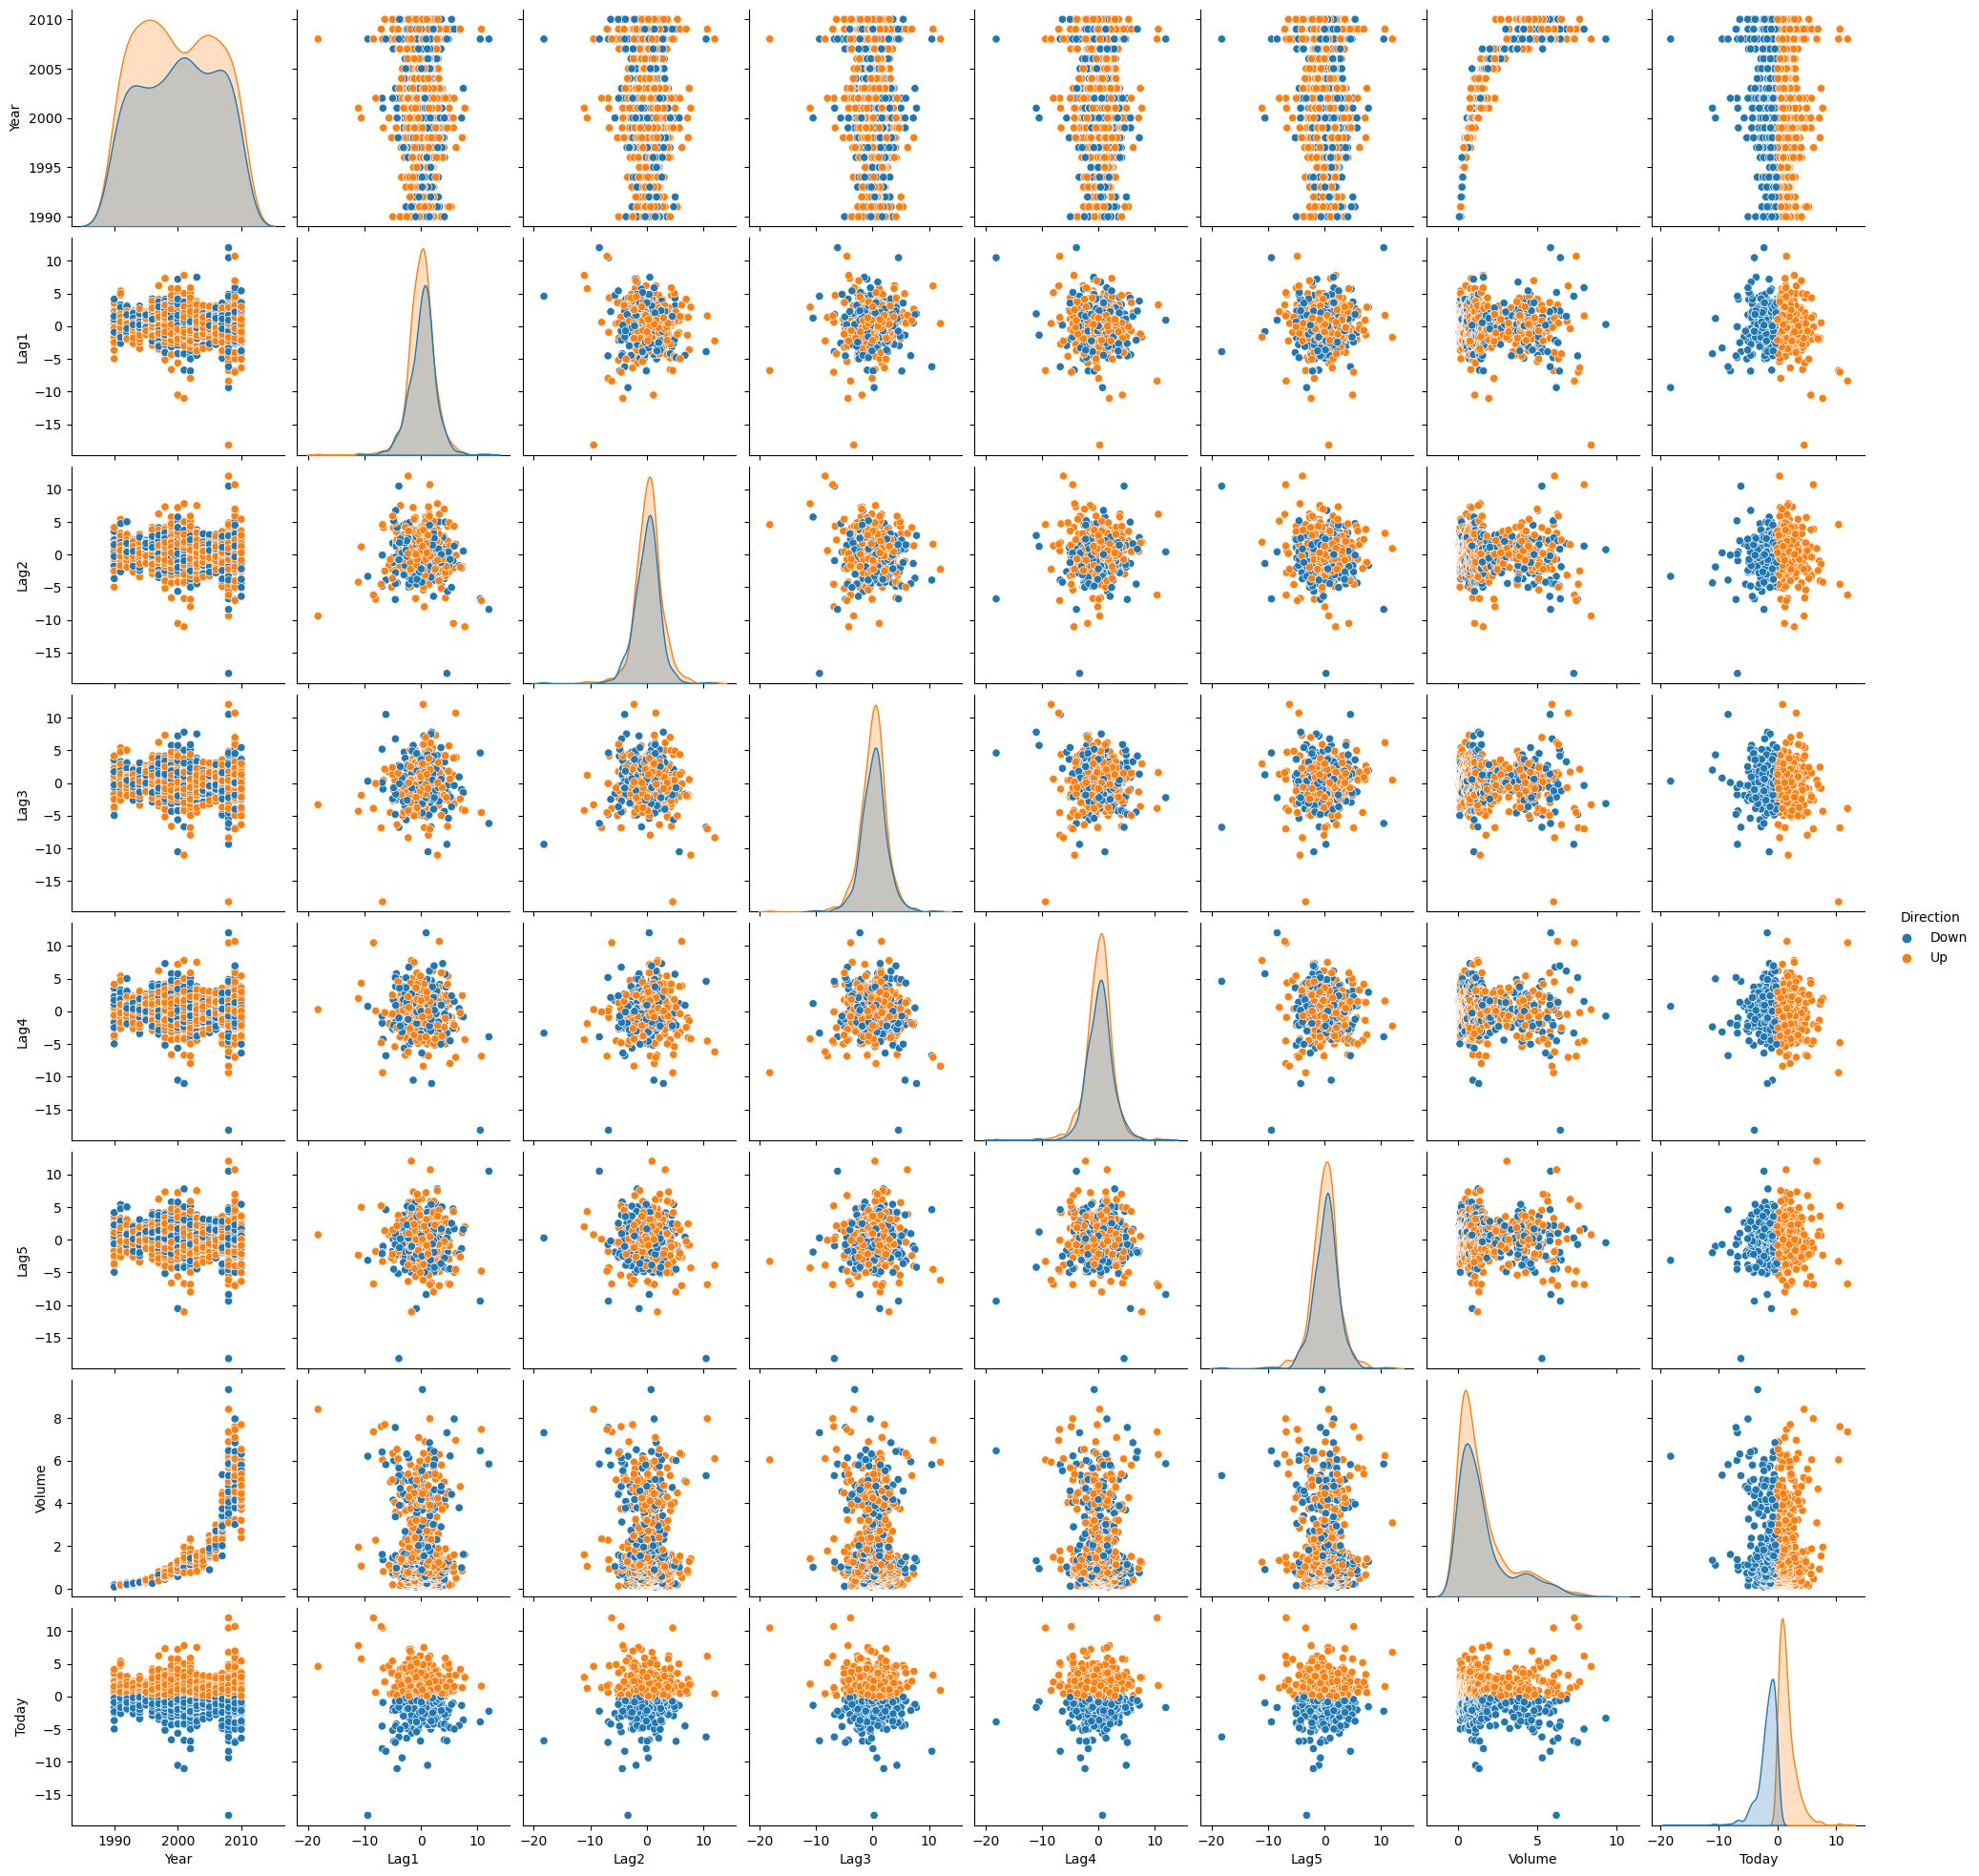

In [58]:
#plotting and comparing the graphical summaries of the weekly data
sns.pairplot(Weekly, hue = "Direction")

[Text(0.5, 0, 'week'), Text(0, 0.5, 'shares traded (billions)')]

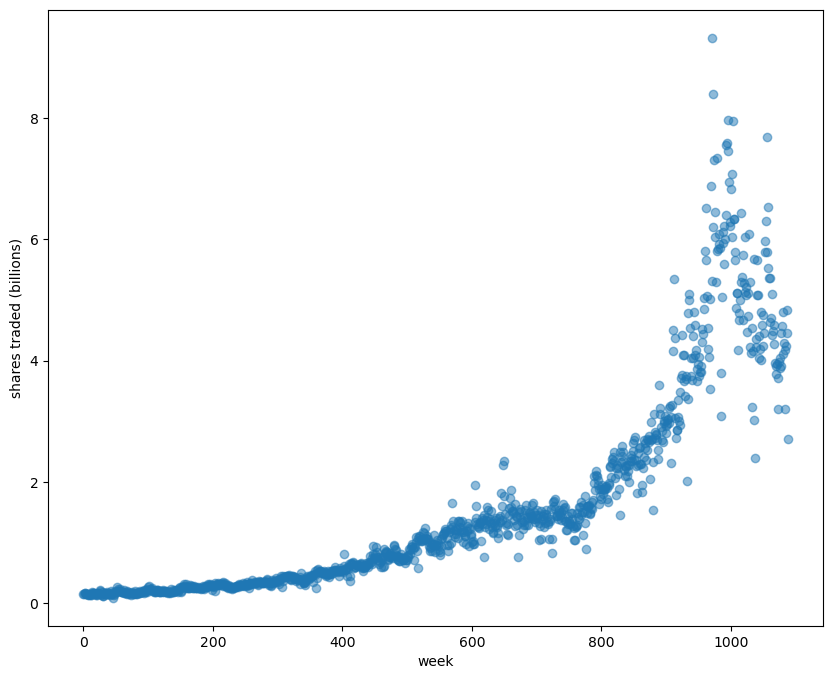

In [59]:
#Making the scatterplot 
fig = plt.figure(figsize = (10,8))
ax = plt.axes()
ax.scatter(x = Weekly.index, y = Weekly["Volume"], alpha = 0.5)
ax.set(xlabel = "week", ylabel = "shares traded (billions)")

4a. We can see that the volume of shares traded each week had increasingly grown from 1990 to 2010. If we look at the scatterplot of volume over time, there is a number of shares we see that is traded each week growing exponentially over the 21 years covered in the scatterplot figure. When also looking at the matrix of correlations between the variables, looking at the last row, we can see that each lag variable is correlated weakly with todays returns from the pairplot graphs.

In [60]:
#Performing the logistic regression with direction as the response and the 5 lag as the variables 
#Plus volume as the predictors 
pd1 = (Weekly["Direction"] == "Up").astype("int64") #response variable 
pd2 = sm.add_constant(Weekly.drop(columns = ["Direction", "Year", "Today"])) #predictor
log_model = sm.Logit(pd1, pd2) #logistic model
log_res = log_model.fit() #logistic regression 
print(log_res.summary()) #prints out the results 

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 29 Oct 2024   Pseudo R-squ.:                0.006580
Time:                        01:29:53   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

In [61]:
#Putting the data into a frame to see what Estimates, Std. Error, z-values, and the P values are
pd.DataFrame({"Estimate" : log_res.params, "Std. error": log_res.bse, "z value" : log_res.tvalues, "Pr(>|z|)": log_res.pvalues})

AttributeError: 'Index' object has no attribute '_format_flat'

        Estimate  Std. error   z value  Pr(>|z|)
const   0.266864    0.085930  3.105613  0.001899
Lag1   -0.041269    0.026410 -1.562610  0.118144
Lag2    0.058442    0.026865  2.175384  0.029601
Lag3   -0.016061    0.026663 -0.602376  0.546924
Lag4   -0.027790    0.026463 -1.050141  0.293653
Lag5   -0.014472    0.026385 -0.548501  0.583348
Volume -0.022742    0.036898 -0.616333  0.537675

4b. Lag 2 is the only predictior that is statistically signifigant. It has a p-value of 0.029601 with a significance level of 5%, The rest seem to be negative making it not significant, but Lag 1 is pretty close to being significant with it being at a 10% level and a p-value of 0.118144

[Text(0.5, 23.52222222222222, 'predicted_label'),
 Text(113.9222222222222, 0.5, 'true_label')]

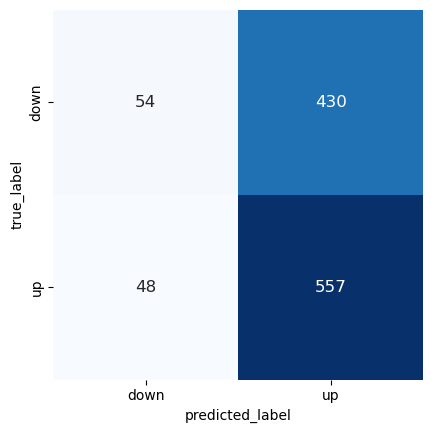

In [62]:
#Creating the confusion matrix diagram 
diagram = pd.DataFrame(log_res.pred_table(), columns = ["down", "up"], index = ["down", "up"])
fig, ax = plt.subplots()
sns.heatmap(diagram, annot = True, cbar = False, fmt = "g", square = True, annot_kws = {"fontsize": "large"}, cmap = "Blues")
ax.set(xlabel = "predicted_label", ylabel = "true_label")



Source that helped me build and understand the confusion matrix: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

In [63]:
#Prediction threshold in the logistical regression and how many True positives there are
log_predict = pd.Series(log_res.predict()).apply(lambda x: "Up" if(x >0.5) else "Down")
(log_predict == Weekly["Direction"]).mean()

0.5610651974288338

4c. In the confusion matrix it tells us theres 54 down weeks that are True positives, meaning theres 54 correct down week classifications. 48 up weeks of False positives, meaning there are 48 up weeks that are incorrectly classified, type I errors (rejecting the null hypothesis when it's actually true). 430 down weeks that are False negatives, meaning 430 down weeks were incorrectly rejected, type II errors (not rejecting the null hypothesis when it is actually false). Finally, 557 up weeks were True negatives, meaning there's 557 up week classifications that were correctly rejected. The prediction threshold being 0.5 correctly predicted that theres around 54 down weeks out of the total 484 down weeks. With an accuracy of about .5611 (training accuracy), the model correctly predicted the direction for 611 weeks out of 1,089.

In [64]:
#Fitting logistic regression model using the training data from 1990 to 2008
train = (Weekly["Year"] < 2009) #Choosing the data from 1990-2008
train_pd1 = (Weekly.loc[train, "Direction"] == "Up").astype("int64") #training the response variable
train_pd2 = sm.add_constant(Weekly.loc[train, "Lag2"]) #training the predictor variable
log_mod = sm.Logit(train_pd1, train_pd2) #logistical model of the traning sets 
log_res = log_mod.fit()
print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Tue, 29 Oct 2024   Pseudo R-squ.:                0.003076
Time:                        01:29:54   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [65]:
#Testing the data 
test_pd1 = sm.add_constant(Weekly.loc[~train, "Lag2"]) #testing the response variable
test_pd2 = Weekly.loc[~train, "Direction"] #testing the predictor variable 
log_test_probability = log_res.predict(test_pd1) #probability test between the set of variables 
#logistical prediction test between the variables 
log_test_predictor = pd.Series(log_test_probability).apply(lambda x: "Up" if (x > 0.5) else "Down")

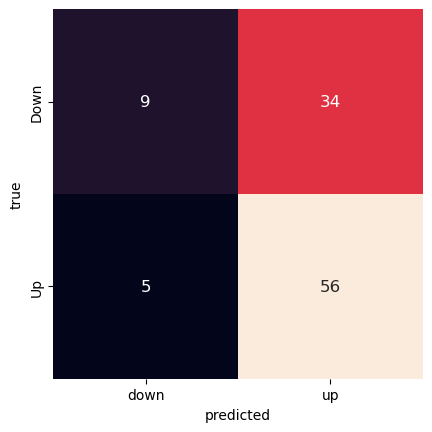

In [78]:
#Making the confusion matrix 
#dig short for diagram
#looking at the confusion matrix for the predictor variables and comparing it to the logistical test predicotors 
dig = pd.DataFrame(confusion_matrix(test_pd2, log_test_predictor), columns = ["down", "up"], index = ["Down", "Up"])
fig, ax = plt.subplots()
sns.heatmap(dig, annot = True, cbar = False, fmt = "g", square = True, annot_kws = {"fontsize": "large"})
ax.set(xlabel = "predicted", ylabel = "true");

In [70]:
(log_test_predictor == Weekly.loc[~train, "Direction"]).mean()

0.625

In [71]:
(Weekly.loc[~train, "Direction"] == "Up").mean()

0.5865384615384616

4d. We can see that the model correctly predicts that the market direction for 62.5% of the weeks in the data 2009 and 2010. However, naively predicting there is still less than a 10% improvement (predicitng if it'll be an up week). In the confusion matrix it shows there is a positive result with an up week resulting in 56/61 which is approximently 0.92, but the false positive rate is approximently .79 (34/43). 

In [77]:
#Repeating this with LDA 
#training and test sets 
x_train = Weekly.loc[train, "Lag2"].to_frame()
y_train = Weekly.loc[train, "Direction"]
x_test = Weekly.loc[~train, "Lag2"].to_frame()
y_test = Weekly.loc[~train, "Direction"]

#Fitting the data into LDA model using the traning sets 
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(113.9222222222222, 0.5, 'True')]

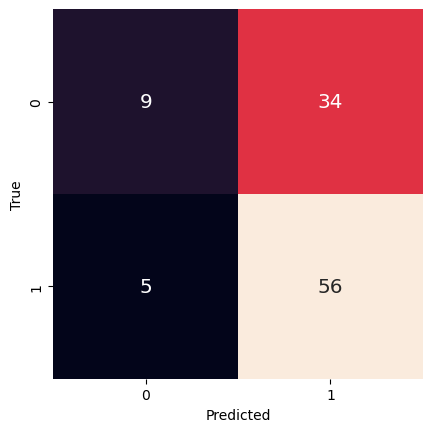

In [81]:
#making the confusion matrix 
y_predictor = lda.predict(x_test)
diagram = confusion_matrix(y_test, y_predictor)
fig, ax = plt.subplots()
sns.heatmap(diagram, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"})
ax.set(xlabel = "Predicted", ylabel = "True")

In [82]:
lda.score(x_test, y_test)

0.625

When using LDA, we can see an identical confusion matrix with Part 4d logistical regression. The positive and false positive results are the same. Along with that, what I didn't mention in part 4d. is that the postive predictive value is 56/90 which is approximently 0.622 and the negative predictive value of 9/14 which is appozimently 0.64. This would also be the same for 4d. 

In [85]:
#Repeating this with QDA
#training and test sets 
x_train = Weekly.loc[train, "Lag2"].to_frame()
y_train = Weekly.loc[train, "Direction"]
x_test = Weekly.loc[~train, "Lag2"].to_frame()
y_test = Weekly.loc[~train, "Direction"]

#Fitting the data into QDA model using the traning sets 
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(113.9222222222222, 0.5, 'True')]

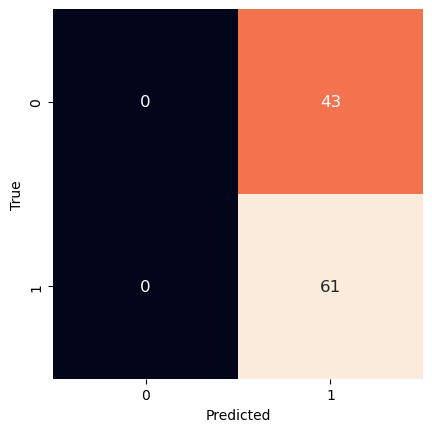

In [98]:
#Making confusion matrix 
y_predictor = qda.predict(x_test)
diagram = confusion_matrix(y_test, y_predictor)
fig, ax = plt.subplots()
sns.heatmap(diagram, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "large"})
ax.set(xlabel = "Predicted", ylabel = "True")

In [87]:
qda.score(x_test, y_test)

0.5865384615384616

When performig QDA we instead see that the model ended up predicting every week in 2009 and 2010 would be an up week. The market direction would be about 58.65% which correctly models the weeks in 2009 and 2010. QDA showed us there there is a better chance compared to the LDA which was 52.5%. Howver, it's better to compare the performace of the QDA model to the logistic regression and the LDA model testings on a larger data set. In the Confusion matrix, there is a true positive rate of 61/61 = 1, but a false positive rate of 43/43 = 1. along with the the postive prediction values is 61/104 which is approximently .587. (theres no negative prediction values)


In [94]:
#Repeating this with KNN with K = 1
#Setting up the traning and test sets
x_train = Weekly.loc[train, "Lag2"].to_frame()
y_train = Weekly.loc[train, "Direction"]
x_test = Weekly.loc[~train, "Lag2"].to_frame()
y_test = Weekly.loc[~train, "Direction"]

#Setting NumPy random seed for consistency
np.random.seed(312)

# Fit the KNN model using the training set
knn1= KNeighborsClassifier(n_neighbors = 1)
knn1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(113.9222222222222, 0.5, 'True')]

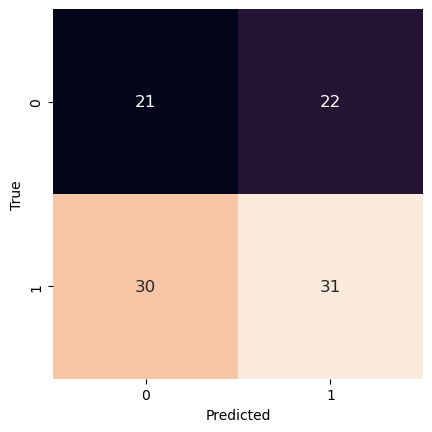

In [99]:
#Making confusion matrix 
y_predictor = knn1.predict(x_test)
diagram = confusion_matrix(y_test, y_predictor)
fig, ax = plt.subplots()
sns.heatmap(diagram, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "large"})
ax.set(xlabel = "Predicted", ylabel = "True")

In [100]:
knn1.score(x_test, y_test)

0.5

When performing KNN with K=1 the model predicts a market direction for 49%, which is pretty close to the LDA (52.5%) and QDA (58.65%). However, out of the other models this is only good at picking the direction randomly, and has the worst performance than naively predicting that every week would be an up week. The positive rate is 30/61 which is approximently .49, a false positive rate of 22/43 which is about .512, a positive perdiction value of 30/52 which is approximently 0.57 and a negative predition value of about 21/52 which is about 0.40

Out of all of these models, and considering the overal prediction accuracy. LDA is a good model to look at, especially because it's exactly the same as the logistic regression models. Aside from KNN, QDA and LDA have a strong prefrence when predicting up weeks, but being cautious about the models because they both have high false positive rates. This means that when investing there is a high percent chance of risk due to the high false positives. 

Sources: 
Logistic regression: https://medium.com/@koushikkushal95/logistic-regression-from-scratch-dfb8527a4226

Stat models and their functions: https://www.statsmodels.org/stable/index.html

Confusion Matrix: https://www.sciencedirect.com/topics/engineering/confusion-matrix#:~:text=A%20confusion%20matrix%20is%20a,performance%20of%20a%20classification%20algorithm.

LDA Algorithm (this also helped me with the QDA and KNN when coding): 
https://medium.com/accel-ai/lda-algorithm-tutorial-in-python-57ee62e71965#:~:text=Jump%20forward%20to%20the%20code,that%20optimizes%20the%20group%20separability.